In [1]:
cd ..

/home/timgarrels/Projects/masterthesis/experiment/motif_position_tooling


In [2]:
from pathlib import Path

data_dir = Path("experiment_data") / "scale_free_bfeeb118-a877-11ed-9901-fff9dab51560"

from motif_position_tooling.utils.motif_io import MotifGraph, MotifGraphWithRandomization

from os import listdir

motif_graphs = [
    MotifGraphWithRandomization(data_dir / i, "scale_free_graph.edgelist")
    for i in listdir(data_dir)
]

# """Are there motifs with an significant high or low degree when compared to occurrences in random networks?"""

In [3]:
from typing import Dict, List
import json

from motif_position_tooling.utils.motif_io import load_motif_zip


def extract_motif_degrees(motif_graph: MotifGraph, motif_size: int) -> Dict[str, List[int]]:
    """Return a lookup motif_id->List of Degrees for all graphlet occurences of the given motif size"""
    with open(motif_graph.get_motif_metric_json(motif_size), "r") as f:
        motif_metric_data = json.load(f)
    degrees = [
        positional_metrics["motif_degree"]
        for motif_index, (_, positional_metrics) in motif_metric_data["motif_data"].items()
    ]

    motifs = load_motif_zip(motif_graph.get_motif_pos_zip(motif_size))
    
    motif_degrees_lookup = {}
    for i, (motif_id, motif_nodes) in enumerate(motifs):
        if motif_id not in motif_degrees_lookup:
            motif_degrees_lookup[motif_id] = []
        motif_degrees_lookup[motif_id].append(degrees[i])

    return motif_degrees_lookup

extract_motif_degrees(motif_graphs[0], 3)

{'001 001 110': [38,
  38,
  38,
  38,
  38,
  39,
  38,
  38,
  38,
  38,
  38,
  38,
  40,
  38,
  39,
  39,
  38,
  38,
  38,
  39,
  40,
  40,
  40,
  40,
  40,
  39,
  39,
  41,
  39,
  39,
  39,
  42,
  50,
  39,
  43,
  51,
  46,
  72,
  65,
  38,
  38,
  38,
  38,
  39,
  38,
  38,
  38,
  38,
  38,
  38,
  40,
  38,
  39,
  39,
  38,
  38,
  38,
  39,
  40,
  40,
  40,
  40,
  40,
  39,
  39,
  41,
  39,
  39,
  39,
  42,
  50,
  39,
  43,
  51,
  46,
  72,
  65,
  38,
  38,
  38,
  39,
  38,
  38,
  38,
  38,
  38,
  38,
  40,
  38,
  39,
  39,
  38,
  38,
  38,
  39,
  40,
  40,
  40,
  40,
  40,
  39,
  39,
  41,
  39,
  39,
  39,
  42,
  50,
  39,
  43,
  51,
  46,
  72,
  65,
  38,
  38,
  39,
  38,
  38,
  38,
  38,
  38,
  38,
  40,
  38,
  39,
  39,
  38,
  38,
  38,
  39,
  40,
  40,
  40,
  40,
  40,
  39,
  39,
  41,
  39,
  39,
  39,
  42,
  50,
  39,
  43,
  51,
  46,
  72,
  65,
  38,
  39,
  38,
  38,
  38,
  38,
  38,
  38,
  40,
  38,
  39,
  39,
  38,
  38,
 

In [4]:
from statistics import mean

def to_count(l: List) -> Dict:
    counts = {}
    for e in l:
        if e not in counts:
            counts[e] = 0
        counts[e] += 1
    return counts


def get_degree_histogram(motif_degrees_lookup: Dict[str, List[int]]) -> Dict[str, Dict[int, float]]:
    """Return a Lookup from Motif_id to a lookup of degree->Frequency"""
    return {motif_id: to_count(degrees) for motif_id, degrees in motif_degrees_lookup.items()}

get_degree_histogram(
    extract_motif_degrees(motif_graphs[0], 3)
)

{'001 001 110': {38: 171,
  39: 199,
  40: 164,
  41: 95,
  42: 56,
  50: 20,
  43: 54,
  51: 28,
  46: 46,
  72: 27,
  65: 27,
  44: 28,
  52: 20,
  47: 29,
  66: 9,
  45: 25,
  53: 7,
  48: 12,
  74: 4,
  73: 16,
  67: 5,
  54: 2,
  49: 2,
  55: 4,
  69: 2,
  58: 1,
  56: 2,
  61: 12,
  82: 1,
  76: 1,
  75: 1,
  26: 59,
  28: 45,
  27: 56,
  36: 71,
  29: 28,
  30: 19,
  31: 19,
  34: 128,
  60: 22,
  32: 10,
  33: 59,
  62: 5,
  37: 45,
  35: 98,
  64: 1,
  7: 1,
  17: 27,
  8: 3,
  12: 4,
  20: 7,
  18: 7,
  21: 8,
  22: 6,
  13: 20,
  24: 5,
  25: 9,
  14: 20,
  23: 6,
  16: 10,
  19: 1,
  4: 2,
  5: 1,
  15: 5,
  2: 2,
  1: 2,
  9: 6,
  10: 4},
 '011 101 110': {71: 4,
  50: 2,
  65: 2,
  39: 3,
  64: 3,
  72: 3,
  49: 4,
  51: 1,
  73: 1,
  66: 2,
  52: 2,
  74: 1,
  53: 1,
  61: 2,
  82: 1,
  75: 2,
  68: 2,
  57: 1,
  83: 1,
  76: 1,
  78: 1,
  97: 1,
  38: 2,
  47: 3,
  42: 2,
  59: 2,
  40: 1,
  41: 2,
  62: 1,
  60: 1,
  70: 1,
  37: 1,
  63: 1,
  45: 5,
  54: 1,
  46: 1,
 

In [5]:
def mean_merge_dicts(dicts: List[Dict]) -> Dict:
    collected = {}
    for d in dicts:
        for k, v in d.items():
            if k not in collected:
                collected[k] = []
            collected[k].append(v)
    return {k: mean(v) for k, v in collected.items()}

mean_merge_dicts([
    {"a": 0, "b": 1, "c": 1},
    {"a": 0, "b": 2, "c": 11},
    {"a": 0, "b": 3, "c": 21},
])

{'a': 0, 'b': 2, 'c': 11}

In [6]:
def mean_merge_histograms(histograms: List[Dict[str, Dict[int, float]]]) -> Dict[str, Dict[int, float]]:
    motif_to_dict_collection = {}
    for h in histograms:
        for motif_id, degree_histogram in h.items():
            if motif_id not in motif_to_dict_collection:
                motif_to_dict_collection[motif_id] = []
            motif_to_dict_collection[motif_id].append(degree_histogram)
    
    for motif_id in motif_to_dict_collection:
        degree_histogram_collection = motif_to_dict_collection[motif_id]
        motif_to_dict_collection[motif_id] = mean_merge_dicts(degree_histogram_collection)
    return motif_to_dict_collection

In [32]:
"""Plotting"""
import matplotlib.pyplot as plt


def plot(original_degree_means: Dict[int, float], swapped_degree_means: Dict[int, float], ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(7,5), dpi=200)
    
    sorter = lambda x: x[0]

    original_items = list(original_degree_means.items())
    swapped_items = list(swapped_degree_means.items())
    
    original_items.sort(key=sorter)
    swapped_items.sort(key=sorter)

    ax.plot(dict(original_items).keys(), dict(original_items).values(), label="Original", alpha=0.7)
    ax.plot(dict(swapped_items).keys(), dict(swapped_items).values(), label="Swapped (random baseline)", alpha=0.7)

    ax.set_xlabel("Degree")
    ax.set_ylabel("#")

    ax.legend()


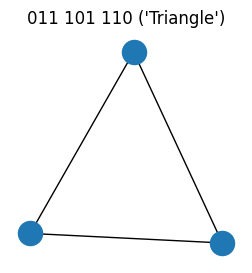

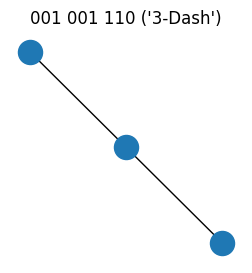

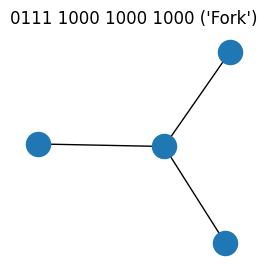

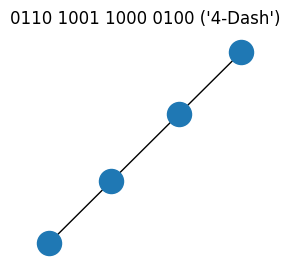

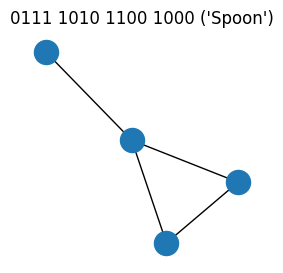

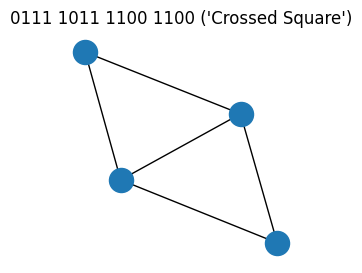

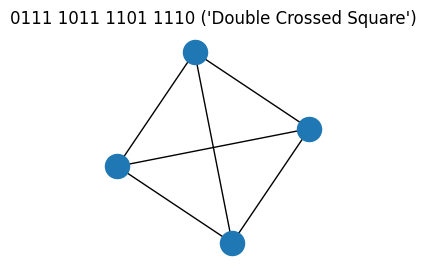

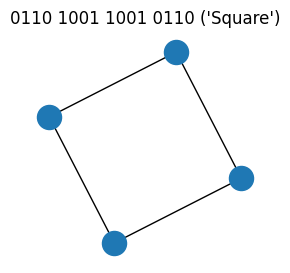

In [44]:
import matplotlib.pyplot as plt
import networkx as nx

from motif_position_tooling.utils.motif_id_to_graph import motif_id_to_graph

motif_name_lookup = {
    "011 101 110": "Triangle",
    "001 001 110": "3-Dash",
    "0111 1000 1000 1000": "Fork",
    "0110 1001 1000 0100": "4-Dash",
    "0111 1010 1100 1000": "Spoon",
    "0111 1011 1100 1100": "Crossed Square",
    "0111 1011 1101 1110": "Double Crossed Square",
    "0110 1001 1001 0110": "Square",
}

for i, motif_id in enumerate(motif_name_lookup):
    fig, ax = plt.subplots(1,1, figsize=(3,3))
    nx.draw(motif_id_to_graph(motif_id), ax=ax)
    ax.set_title(f"{motif_id} ('{motif_name_lookup[motif_id]}')")
    

In [ ]:
g = motif_graphs[99]
k = 3

original_motif_degrees = extract_motif_degrees(g, k)
original_degree_histogram = get_degree_histogram(original_motif_degrees)

swapped_histograms = [
    get_degree_histogram(extract_motif_degrees(sg, k))
    for sg in g.swapped_graphs
]
mean_swapped_histogram = mean_merge_histograms(swapped_histograms)


motif_ids = set(original_degree_histogram.keys()).union(mean_swapped_histogram.keys())

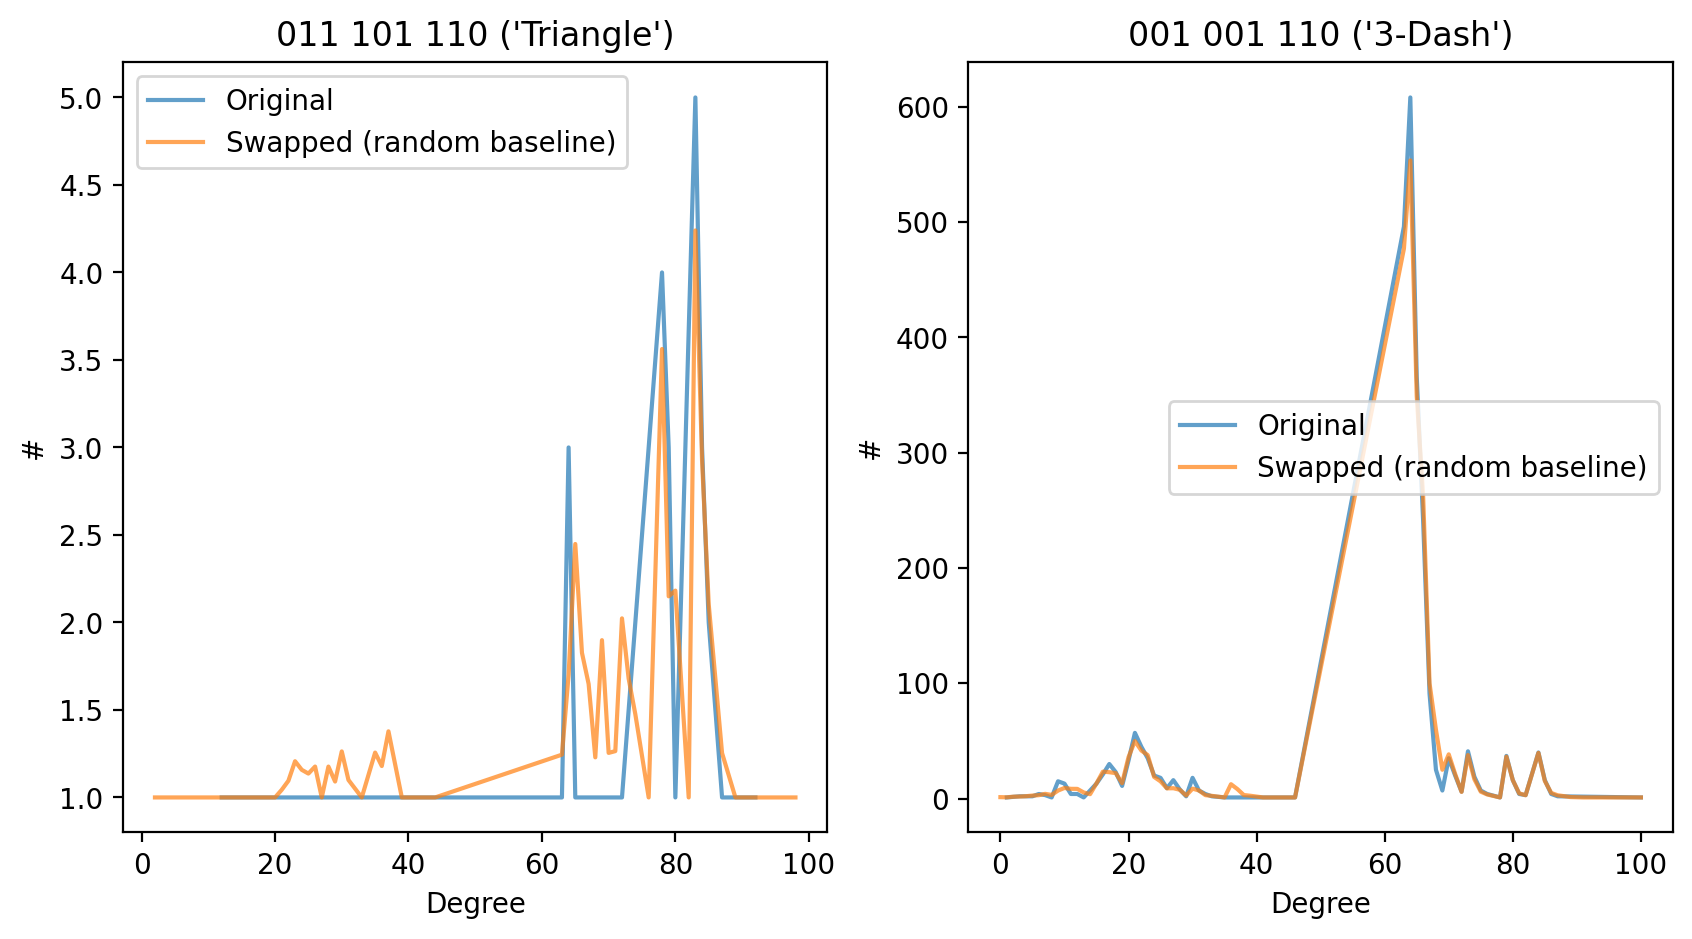

In [38]:

fig, axes = plt.subplots(1, len(motif_ids), figsize=(10,5), dpi=200)
for i, motif_id in enumerate(motif_ids):
    plot(
        original_degree_histogram[motif_id],
        mean_swapped_histogram[motif_id],
        ax=axes[i],
    )
    axes[i].set_title(f"{motif_id} ('{motif_name_lookup[motif_id]}')")
